# k-Means Clustering

Today, we're going to implement our own k-Means clustering function. We will use this function, and another clustering model from scikit-learn, to replicate the results of Ahlquist & Breunig (2012). The data for this paper has been provided.

## Imports

We'll need _at least_ the following modules. You may use additional modules if they are helpful.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

## First, let's implement k-Means

Remember, the k-Means algorithm consists of the following steps:

1. Randomly initialize k points within the range of your data.
    * Hint: you can do this either by randomly sampling points from within the bounds of all the variables you'll be clustering _or_ you can randomly sample values from your actual data.
2. Compute the distance from every cluster to every point in your data.
3. Find the nearest cluster to every point.
4. For all the points in each cluster, compute their mean value.
5. Use the newly-found mean values as your new cluster centroids.
6. Repeat X times (usually 10-20).

## A note on notation

* `data` is your dataset - an (n x p) numpy array
* `centroids` are the means of each cluster, a (k x p) numpy array
* `n` is the number of datapoints in your data
* `k` is the number of clusters
* `p` is the number of variables per data point
* `x` and `y` represent two singular datapoints
* `dists` represents an (n x k) numpy array of distances
* `iterations` is the number of iterations to run the model

## Problem 1

Complete the below functions. The red "docstrings" at the top of each function tells you precisely what each function should input and output. It also describes what the function should accomplish.

In [2]:
def euclidean_distance(x,y):
    """
    This function computes sqrt((x-y)^2) for two points, x and y.
    Inputs
        x: a (1 x p) numpy array
        y: a (1 x p) numpy array
    Outputs
        A single numerical value, the distance between x and y.
    """
    distance = np.sqrt(np.sum((x - y)**2))

    return distance

def get_distances(data, centroids):
    """
    This function computes the distances from every point to every
    cluster centroid.
    Inputs
        data: an (n x p) numpy array of data points
        centroids: a (k x p) numpy array of cluster centers
    Outputs
        An (n x k) numpy array of distances from points to clusters.
    """
    distance_matrix = np.empty((data.shape[0], centroids.shape[0]))
    
    for i in range(0,data.shape[0]):
        for j in range(0,centroids.shape[0]):
            distance_matrix[i,j] = euclidean_distance(data[i], centroids[j])

    return distance_matrix
    
def get_clusters(dists):
    """
    This function computes the cluster assignment for all points.
    Inputs
        dists: an (n x k) numpy array
    Outputs
        An (n x 1) numpy array of datapoints by cluster assignments.
    """
    cluster_assignments = np.argmin(dists, axis = 1)
    ## Hint: np.argmin will help...
    
    return cluster_assignments

def compute_new_centroids(data, cluster_assignments):
    """
    This function computes the new centroids (means) for each cluster.
    Inputs
        data: an (n x p) numpy array of your data points
        cluster_assignments: an (n x 1) numpy array giving the nearest 
            cluster to each point in your dataset.
    Outputs
        A (k x p) numpy array of cluster centroids (means).
    """
    uniqueClusterIndexes = np.unique(cluster_assignments)
    sz = uniqueClusterIndexes.size    
    centroids =  np.empty((sz, data.shape[1]))   
    for i, idx in enumerate(uniqueClusterIndexes):
        currentDataIndexes = np.argwhere(cluster_assignments == idx)
        sh = currentDataIndexes.shape[0]      
        if sh > 0:
            centroids[i] = np.mean(data[currentDataIndexes.reshape(sh,)], axis=0)

    return centroids

def kmeans(data, k=3, iterations=10):
    """
    Runs the k-Means algorithm.
    Inputs
        data: an (n x p) numpy array representing your data
        k: the number of clusters to estimate (1 < k <= n)
        iterations: the number of cycles to run the algorithm
    Outputs
        A tuple of (cluster_assignments, centroids) where:
         * cluster_assignments is a numpy array of (n x 1)
         * centroids is a numpy array of (k x p)
    """
    
    ## Initialize k randomly-selected points for centroids.
    ## You might find np.random.choice to help here.   
    
    centroids = data[np.random.choice(data.shape[0], k, replace=False)].copy()
    
    print("K-means initial centroids:\n", centroids)
    
    ## Loop for _iterations_ times.
    for ii in range(iterations):        
        
        ## 1. Compute distances between data and centroids
        distances = get_distances(data, centroids)       
        
        ## 2. Get cluster assignment for each datapoint
        cluster_assignments = get_clusters(distances)       
        
        ## 3. Compute new cluster centroids
        tmpClusters = compute_new_centroids(data, cluster_assignments)
        for i, newCentroidIndex in enumerate(np.unique(cluster_assignments)):
            centroids[newCentroidIndex] = tmpClusters[i]
            
    return (cluster_assignments, centroids)

## Problem 2

Let's test our kmeans function with the Iris data we've used before. I've given you a plotting function to make it easy...

In [3]:
def plot_categories(X, Y, category):
    fig, ax = plt.subplots()
    unique_categories = np.unique(category)
    for cat in unique_categories:
        ax.plot(X[category==cat], Y[category==cat], marker='o', linestyle='', label=cat)
    return ax

def plot_categories_with_labels(X, Y, category, labels):
    fig, ax = plt.subplots()
    unique_categories = np.unique(category)
    for cat in unique_categories:
        ax.plot(X[category==cat], Y[category==cat], marker='o', linestyle='', label=cat)
    for i, txt in enumerate(labels):
        ax.annotate(txt, (X[i], Y[i]))

    return ax

Now, we will read the Iris dataset and use just the `PetalLength` and `PetalWidth` features (columns). Below, I have provided code to plot these two features.

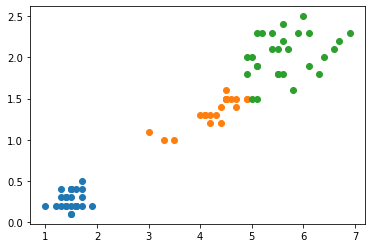

In [4]:
iris = pd.read_csv("iris.csv")
features = np.array(iris[["PetalLength","PetalWidth"]])
plot_categories(features[:,0], features[:,1], iris["Species"])

Finally, see how well your k-means algorithm does. First, let's use `k=3` and `iterations=1`. Compute the results and make a new plot colored by cluster assignment

K-means initial centroids:
 [[1.3 0.2]
 [4.9 2. ]
 [1.5 0.2]]


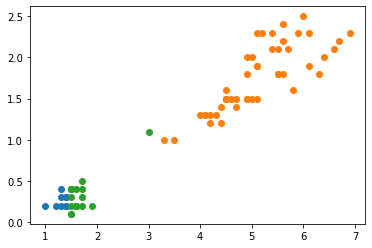

In [5]:
## Your code here...

result_3_1 = kmeans(features, 3, 1)
plot_categories(features[:,0], features[:,1],result_3_1[0])

## Problem 3

Now, increase `iterations` to 10 and plot the results. How do they compare to the true values from the Iris dataset?

K-means initial centroids:
 [[5.8 1.6]
 [5.6 2.2]
 [1.5 0.4]]


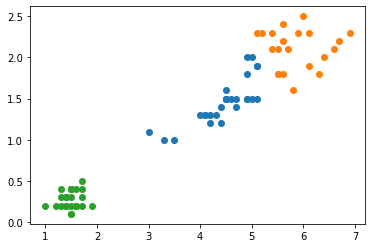

In [6]:
result_3_10 =kmeans(features, 3, 10)
plot_categories(features[:,0], features[:,1],result_3_10[0])


## Problem 4

Just for fun, let's see what happens if we increase `k` to 6. Plot the results below.

K-means initial centroids:
 [[5.6 2.4]
 [6.7 2.2]
 [3.5 1. ]
 [1.6 0.2]
 [3.3 1. ]
 [5.4 2.3]]


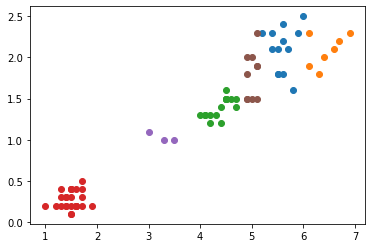

In [7]:
result_6_10 =kmeans(features, 6, 10)
plot_categories(features[:,0], features[:,1],result_6_10[0])

## Problem 5

Let's replicate Ahlquist & Breunig (2012) Figure 3a. I've gotten you started (below) by loading the data and adding the "ground truth" VOC values.

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

data = pd.read_csv("iversen.csv")
countries = ["AUS", "CAN","GBR",
            "JPN","CHE","USA",
            "AUT","BEL","DEU",
            "FRA","ITA","DNK",
            "FIN","NLD","NOR",
            "SWE","GRC", "IRL", 
            "NZL","PRT","ESP"]
VoC_class = ["LME","LME","LME",
             "CME","CME","LME",
             "CME","CME","CME",
             "NC","NC","CME",
             "CME","CME","CME",
             "CME","NC","LME",
             "LME","NC", "NC"]
VoC_color = {"CME":"red","LME":"black","NC":"green"}

voc_data = pd.DataFrame(list(zip(countries,VoC_class)), columns=["wbcode","voc"])

merged_data = pd.merge(data, voc_data, on="wbcode")
print(merged_data.head())
print(merged_data.shape)

  wbcode    country  year  epl  cdp  cop  nurr  gb  dsj  voc
0    AUS  Australia  1995  1.0  2.6    1    32  30    1  LME
1    AUT    Austria  1995  2.6  3.3    3    43  78    3  CME
2    BEL    Belgium  1995  1.5  4.1    2    57  99    2  CME
3    CAN     Canada  1995  0.9  3.4    1    32  49    2  LME
4    DNK    Denmark  1995  1.6  3.1    2    60  76    3  CME
(18, 10)


Now, let's use sklearn's `StandardScaler` to scale our variables to have 0 mean and 1 variance. You can find the documentation for this at https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html.

In [9]:
scaler_employment = StandardScaler()
scaled_employment_data = scaler_employment.fit_transform(merged_data[["epl","cdp","cop"]])

scaler_unemployment = StandardScaler()
scaled_unemployment_data = scaler_unemployment.fit_transform(merged_data[["nurr","gb","dsj"]])

Next, we'll use sklearn's `PCA` to compute principal components that represent employment and unemployment variables. This process is described in section 4.1.1 of the paper. We stack these into an `X` matrix of size (n x 2).

In [10]:
employment_pca = PCA(n_components=1)
employment_pca_values = employment_pca.fit_transform(scaled_employment_data)

unemployment_pca = PCA(n_components=1)
unemployment_pca_values = unemployment_pca.fit_transform(scaled_unemployment_data)

X = np.hstack([employment_pca_values, unemployment_pca_values])
print(X.shape)

(18, 2)


Now, use both your k-means implementation and sklearn's `GaussianMixture` to reproduce Figure 3(a) of the paper. You do not need to draw the ellipses around the clusters, just color the points by cluster like we did above. For the Gaussian Mixture model, use `covariance_type='tied'`. Also, you should use `k=5` for your k-means and `n_components=5` for the Gaussian Mixture.

In [11]:
clf = GaussianMixture(n_components=5, covariance_type='tied')
em = clf.fit(X)

## Problem 6

Now that you've estimated a Gaussian Mixture model, you will need to make predictions for each datapoint. That is, predict the cluster that every datapoint belongs to. You can use the `.predict(...)` method of your Gaussian Mixture object to do so. See the documentation if it is unclear.

In [12]:
clusters = em.predict(X)
kmeans_clusters = kmeans(X, 5, 100)
print("MBC clusters:", clusters)
print("K-means clusters:", kmeans_clusters[0])    

K-means initial centroids:
 [[ 0.09409683 -2.16557462]
 [-0.31824561 -0.24068914]
 [-1.04561028  2.07557617]
 [ 2.23475822  2.20462244]
 [ 1.62910326  1.40259831]]
MBC clusters: [1 4 0 1 0 0 0 4 1 2 3 4 1 0 4 0 1 1]
K-means clusters: [4 0 0 4 0 1 1 1 4 2 2 0 4 1 1 0 3 3]


## Problem 7

Plot your results for k-means and for the gaussian mixture model. You can use the same function we used for the iris data.

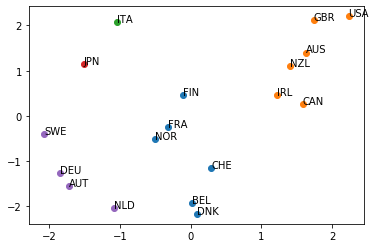

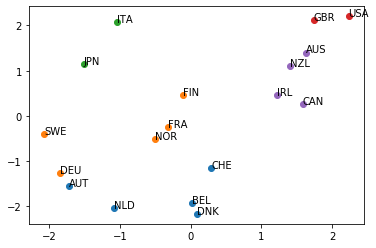

In [13]:
plot_categories_with_labels(X[:,0], X[:,1],clusters,merged_data["wbcode"])
plot_categories_with_labels(X[:,0], X[:,1],kmeans_clusters[0],merged_data["wbcode"])

## Problem 8

Select a dataset of your choice (any...) and use clustering (either k-means or any of the clustering options available from [scikit-learn](https://scikit-learn.org/stable/modules/clustering.html)) to explore that dataset. Prepare to discuss your data, your clustering choices, and the results for approximately 5-10 minutes on March 24.

## Step 1:  Download [Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) from UCI Machine Learning Repository

In [14]:
tdf = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', sep = ',')
header = ["age", "sex", "cp", "trestbps", "chol", "fbs","restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
tdf.columns = header
print(tdf.info())
tdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
age         302 non-null float64
sex         302 non-null float64
cp          302 non-null float64
trestbps    302 non-null float64
chol        302 non-null float64
fbs         302 non-null float64
restecg     302 non-null float64
thalach     302 non-null float64
exang       302 non-null float64
oldpeak     302 non-null float64
slope       302 non-null float64
ca          302 non-null object
thal        302 non-null object
num         302 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


## Step 2:  Perform Initial Inspection of Dataset

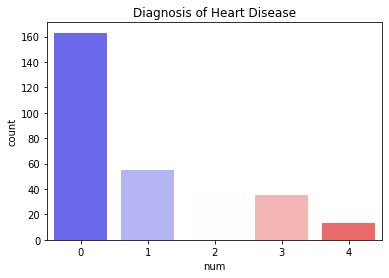

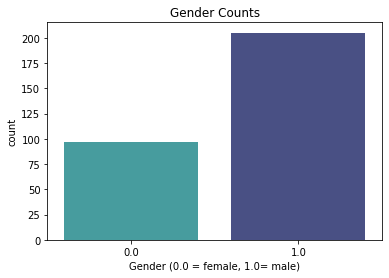

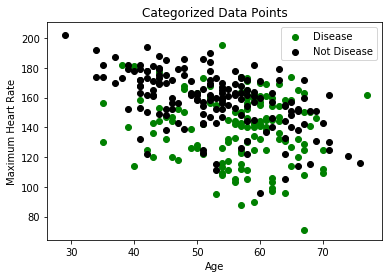

In [15]:
sns.countplot(x="num", data=tdf, palette="bwr").set_title('Diagnosis of Heart Disease')
plt.show()
sns.countplot(x='sex', data=tdf, palette="mako_r").set_title('Gender Counts')
plt.xlabel("Gender (0.0 = female, 1.0= male)")
plt.show()
plt.scatter(x=tdf.age[tdf.num >= 1], y=tdf.thalach[(tdf.num >= 1)], c="green")
plt.scatter(x=tdf.age[tdf.num == 0], y=tdf.thalach[(tdf.num == 0)], c = 'black')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title("Categorized Data Points")
plt.show()

## Step 3:  Trim, Modify & Scale Dataset

************missing ca values************
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
165  52.0  1.0  3.0     138.0  223.0  0.0      0.0    169.0    0.0      0.0   
191  43.0  1.0  4.0     132.0  247.0  1.0      2.0    143.0    1.0      0.1   
286  58.0  1.0  2.0     125.0  220.0  0.0      0.0    144.0    0.0      0.4   
301  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope ca thal  num  
165    1.0  ?  3.0    0  
191    2.0  ?  7.0    1  
286    2.0  ?  7.0    0  
301    1.0  ?  3.0    0  

************missing thal values************
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
86   53.0  0.0  3.0     128.0  216.0  0.0      2.0    115.0    0.0      0.0   
265  52.0  1.0  4.0     128.0  204.0  1.0      0.0    156.0    1.0      1.0   

     slope   ca thal  num  
86     1.0  0.0    ?    0  
265    2.0  0.0    ?    2  


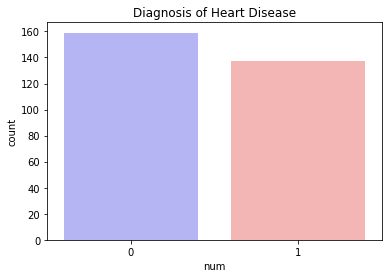

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 300
Data columns (total 13 columns):
age         296 non-null float64
sex         296 non-null float64
cp          296 non-null float64
trestbps    296 non-null float64
chol        296 non-null float64
fbs         296 non-null float64
restecg     296 non-null float64
thalach     296 non-null float64
exang       296 non-null float64
oldpeak     296 non-null float64
slope       296 non-null float64
ca          296 non-null float64
thal        296 non-null float64
dtypes: float64(13)
memory usage: 42.4 KB
None


In [16]:
# Display rows of missing data
print("************missing ca values************")
print(tdf[(tdf["ca"] == "?")])
print()
print("************missing thal values************")
print(tdf[(tdf["thal"] == "?")])

# Remove rows with missing values for "ca" field
tdf = tdf.loc[lambda df: df["ca"] != "?", :]
# Remove rows with missing values for "ca" field
tdf = tdf.loc[lambda df: df["thal"] != "?", :]

# Set "num" field = 1 when value > 1
tdf.loc[tdf.num > 1, 'num'] = 1

# Change type of "ca" and "thal" fields to "float64"
tdf["ca"] = tdf["ca"].astype("float64")
tdf["thal"] = tdf["thal"].astype("float64")

# Remove diagnosis column (num)
heartData = tdf.iloc[:, :-1]

# Store diagnosis labels separately
heartLabels = tdf.iloc[:, 13]

sns.countplot(x="num", data=tdf, palette="bwr").set_title('Diagnosis of Heart Disease')
plt.show()

print(heartData.info())

# Scale data set
scaler_heart = StandardScaler()
heartData = scaler_heart.fit_transform(heartData)

## Step 4:  Execute K-Means Clustering Algorithm

In [17]:
# Invoke K-Means clustering algorithm
kmeans_clusters_heart = kmeans(heartData, 2, 100)

# Partion results into two different variables
noDisease = np.argwhere(kmeans_clusters_heart[0] == 0)
withDisease = np.argwhere(kmeans_clusters_heart[0] == 1)
s1 = noDisease.shape[0]
s2 = withDisease.shape[0]
d0 = heartData[noDisease.reshape(s1,)]
d1 = heartData[withDisease.reshape(s2,)]

K-means initial centroids:
 [[-0.49948536 -1.44337567 -1.21836649 -0.65641339 -0.06537011 -0.40663784
  -1.00004628  0.54059237 -0.69816702  0.04179905 -0.9757881  -0.72383218
  -0.8911491 ]
 [-0.27815652  0.69282032  0.87227977 -1.33262579 -0.27694572  2.45919073
  -1.00004628 -0.11324313 -0.69816702 -0.81740363 -0.9757881   2.47399359
   1.17366604]]


## Step 5:  Assess Clustering Accuracy via [Fowlkes-Mallows Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html#sklearn.metrics.fowlkes_mallows_score)

Accuracy: 0.73


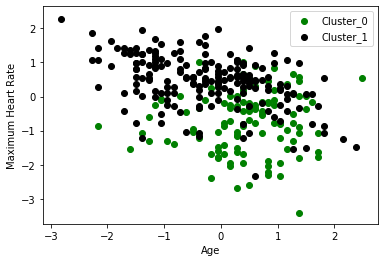

In [18]:
from sklearn.metrics.cluster import fowlkes_mallows_score
tResult = kmeans_clusters_heart[0]
accuracy = fowlkes_mallows_score(heartLabels, tResult)
print('Accuracy: {:.2f}'.format(accuracy))

plt.scatter(x=d1[:, 0], y=d1[:, 7], c="green")
plt.scatter(x=d0[:, 0], y=d0[:, 7], c = 'black')
plt.legend(["Cluster_0", "Cluster_1"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()